In [2]:
'''
Q1

@author: robert
'''
import numpy as np
from scipy.spatial import distance

def KMeans (data, K, dim):          #K=clusters, dim = dimensions from data
    X = data[:,[range(0,dim)]]      #Data Array to classify    
    C = data[:K,[range(0,dim)]]     #First elements as centroids
    C_last = np.zeros((K, dim))
    
    while (C != C_last).all():
        C_last = np.copy(C)  
        D = np.zeros((K,X.shape[0]))    #D Array to save distances
        Dmin = np.zeros((K,X.shape[0])) #Array to save mininums
        
        for i in range(0,K):            
            for j in range(0,X.shape[0]):
                D[i,j] = distance.euclidean(C[i], X[j])     #Save Euclidean distances            
        for k in range(0,D.shape[1]):
            Dmin[np.argmin(D[:,k]),k]=1                     #Distances matrix
        
        for i in range(0,K):                                
            sum = np.zeros((1, dim))
            inc = 0
            for j in range(0,Dmin.shape[1]):
                if(Dmin[i,j]==1):
                    sum += X[j]
                    inc+=1
            C[i] = sum/inc
    return C ,Dmin

Best Centroids for K= 3 Dimensions= 2 

[[[ 6.80208333  3.06875   ]]

 [[ 5.76346154  2.69038462]]

 [[ 5.006       3.418     ]]]

MSE C1:  0.173333333333
MSE C2:  0.173333333333
MSE C3:  0.0
MSE Global:  0.115555555556


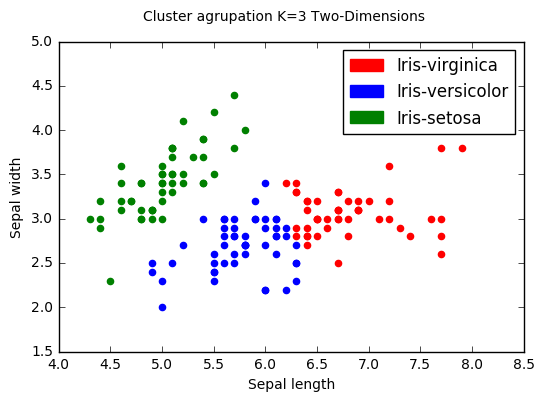



Best Centroids for K= 3 Dimensions= 4 

[[[ 6.17727273  3.25795455  4.05568182  1.34545455]]

 [[ 5.54509804  2.67058824  3.76470588  1.16078431]]

 [[ 4.55454545  3.2         1.35454545  0.2       ]]]

MSE C1:  0.4
MSE C2:  0.273333333333
MSE C3:  0.26
MSE Global:  0.311111111111


In [4]:
'''
Q2

@author: robert
'''
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from timeit import itertools
from sklearn.metrics.regression import mean_squared_error

def KMeans (data, K, dim):          #K=clusters, dim = dimensions from data
    X = data[:,[range(0,dim)]]      #Data Array to classify    
    C = data[:K,[range(0,dim)]]     #First elements as centroids
    C_last = np.zeros((K, dim))
    
    while (C != C_last).all():
        C_last = np.copy(C)  
        D = np.zeros((K,X.shape[0]))    #D Array to save distances
        Dmin = np.zeros((K,X.shape[0])) #Array to save mininums
        
        for i in range(0,K):            
            for j in range(0,X.shape[0]):
                D[i,j] = distance.euclidean(C[i], X[j])     #Save Euclidean distances            
        for k in range(0,D.shape[1]):
            Dmin[np.argmin(D[:,k]),k]=1                     #Distances matrix
        
        for i in range(0,K):                                #
            sum = np.zeros((1, dim))
            inc = 0
            for j in range(0,Dmin.shape[1]):
                if(Dmin[i,j]==1):
                    sum += X[j]
                    inc+=1
            C[i] = sum/inc
    return C ,Dmin   

    
#Read data from file
data = np.loadtxt("iris.data",delimiter = ',',usecols=range(0,4))
labels = np.loadtxt("iris.data",dtype = np.str, delimiter = ',',usecols=(4,))
K=3

y_true = np.zeros((K, data.shape[0]))
y_true[0,[range(100,150)]]=1
y_true[1,[range(50,100)]]=1
y_true[2,[range(0,50)]]=1


dim=2

C , dist = KMeans(data,K,dim)
print 'Best Centroids for K=',K,'Dimensions=',dim,'\n\n',C

print '\nMSE C1: ',mean_squared_error(y_true[0], dist[0])
print 'MSE C2: ',mean_squared_error(y_true[1], dist[1])
print 'MSE C3: ',mean_squared_error(y_true[2], dist[2])
        
print 'MSE Global: ',mean_squared_error(y_true,dist)


X = data[:,[range(0,dim)]] 
colors = itertools.cycle(["r", "b", "g"])
for row in range(0,dist.shape[0]):
    pointsX = []
    pointsY = []
    for col in range(0,dist.shape[1]):
        if(dist[row,col]==1):
            pointsX.append(data[col,0])
            pointsY.append(data[col,1])
    plt.scatter(pointsX, pointsY,color=next(colors))
plt.suptitle("Cluster agrupation K=3 Two-Dimensions") 
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")  
red_patch = mpatches.Patch(color='red', label='Iris-virginica')
blue_patch = mpatches.Patch(color='blue', label='Iris-versicolor')
green_patch = mpatches.Patch(color='green', label='Iris-setosa')
plt.legend(handles=[red_patch,blue_patch,green_patch]) 
plt.show()

dim=4    

C , dist = KMeans(data,K,dim)
print '\n\nBest Centroids for K=',K,'Dimensions=',dim,'\n\n',C
# print 'Distances:\n',dist

print '\nMSE C1: ',mean_squared_error(y_true[0], dist[0])
print 'MSE C2: ',mean_squared_error(y_true[1], dist[1])
print 'MSE C3: ',mean_squared_error(y_true[2], dist[2])
        
print 'MSE Global: ',mean_squared_error(y_true,dist)

